In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Linear Regression with one variable

In [4]:
df = '/home/balerion/Desktop/leetcode_Ai/Ai/Andrew-NG-Notes/Machine Learning notebooks By Andrew NG/ex1/data/ex1data1.txt'
cols = np.loadtxt(df,delimiter=',',usecols=(0,1),unpack=True) # unpack transpose the cols

# df = pd.read_csv("/home/balerion/Desktop/Ai/Andrew-NG-Notes/Machine Learning notebooks By Andrew NG/ex1/data/ex1data1.txt")
# print(cols)

# now we have two rows

X = np.transpose(np.array(cols[:-1])) # 1st row of cols transposed and put into X (now it has n rows and 1 col)
# X = np.array(cols[:-1])
y = np.transpose(np.array(cols[-1:]))
# print(X)
m = X.size
X = np.insert(X,0,1,axis=1)

Why insert 1 in the begining?

In [3]:
# To incorporate the intercept term into the linear regression model using matrix notation,
# we augment the feature matrix X.

# X with a column of ones. This allows the intercept term to be included naturally in the matrix multiplication.

# Plotting the data

Text(0.5, 0, 'Population of City in 10,000s')

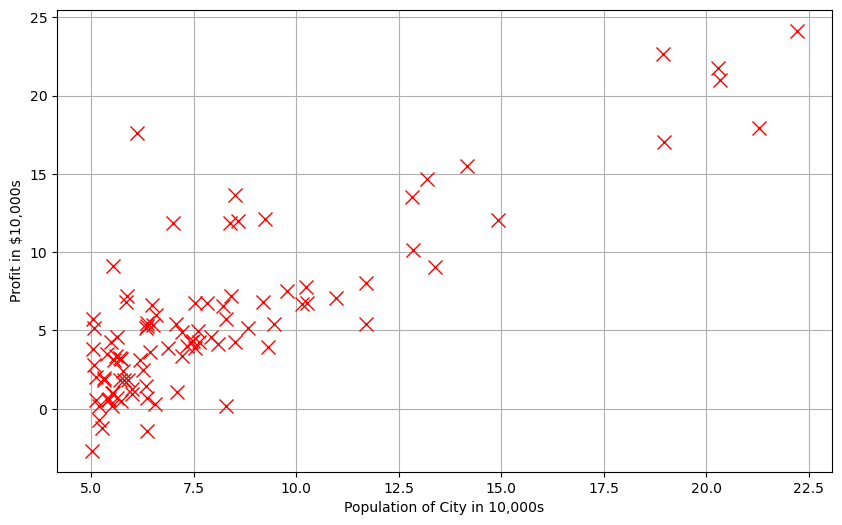

In [5]:
#Plot the data to see what it looks like
plt.figure(figsize=(10,6))
plt.plot(X[:,1],y[:,0],'rx',markersize=10)
plt.grid(True)
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')

# Gradient Descent

linear regression parameters θ to our dataset
using gradient descent

In [6]:
iterations = 1500 # more the iteration better the result
alpha = 0.01 # smaller the value of alpha better the result

In [7]:
# # linear hypothesis function
def h(theta , X):
    return np.dot(X , theta)

#Compute cost function
def computeCost(mytheta,X,y):
    """
    theta_start is an n- dimensional vector of initial theta guess
    X is matrix with n- columns and m- rows
    y is a matrix with m- rows and 1 column
    """
    
    return float((1./(2*m)) * np.dot((h(mytheta,X)-y).T,(h(mytheta,X)-y)))

initial_theta = np.zeros((X.shape[1] , 1))  # X.shape[1] --> number of columns in X = 2 shape of initial_theta = 2 X 1
print (computeCost(initial_theta,X,y)) #(theta is a vector with n rows and 1 columns (if X has n features) )


# def computeCost(mytheta, X, y):
#     """
#     mytheta is an n-dimensional vector of theta parameters
#     X is a matrix with n columns and m rows (features)
#     y is a matrix with m rows and 1 column (target variable)
#     """
#     # Compute the hypothesis function
#     h_theta = np.dot(X, mytheta)
#     # print(h_theta)
    
    
#     # Compute the squared error
#     squared_error = np.square(h_theta - y)
    
#     # Compute the cost function
#     cost = np.sum(squared_error) / (2 * m)  # Divide by the number of training examples (m)
    
#     return cost

# initial_theta = np.zeros((X.shape[1] , 1))
# # initial_theta.shape
# # X.shape


# print(computeCost(initial_theta,X,y))




32.07273387745567


In [8]:
def descendGradient(X , start_theta = np.zeros(2)):
    """
    theta_start is an n- dimensional vector of initial theta guess
    X is matrix with n- columns and m- rows
    """
    
    theta = start_theta
    jvec = []
    thetahistory = []
    
    for _ in range(iterations):
        temptheta = theta
        
        jvec.append(computeCost(theta,X,y))
        thetahistory.append(list(theta[:,0]))
        for j in range(len(temptheta)):
            temptheta[j] = theta[j] - (alpha/m)*np.sum((h(theta,X) - y)*np.array(X[:,j]).reshape(m,1))
        theta = temptheta
    return theta, thetahistory, jvec
        

# Batch Gradient Algorithm

Steps in Batch Gradient Descent


Initialize Parameters: Start with initial guesses for the parameters theta. These can be zeros or small random values.

Compute the Cost Function: Evaluate the cost function J(θ) using the entire training dataset.

Compute the Gradients: Calculate the gradient (partial derivatives) of the cost function with respect to each parameter (θj). The gradients indicate the direction and rate of change of the cost function.

Update Parameters: Adjust the parameters in the opposite direction of the gradient. The learning rate α determines the size of the steps taken towards the minimum of the cost function.

Repeat: Iterate steps 2 to 4 until convergence, i.e., until the cost function no longer decreases significantly or a maximum number of iterations is reached.

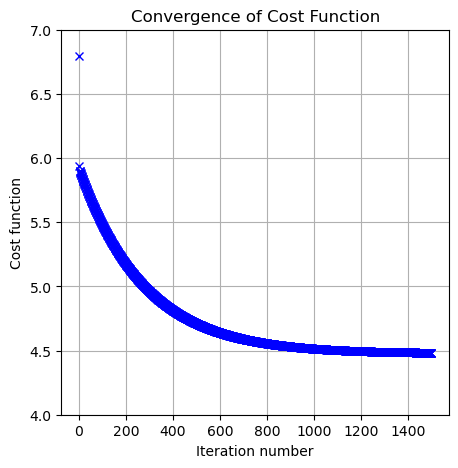

In [9]:
initial_theta = np.zeros((X.shape[1],1))
theta, thetahistory, jvec = descendGradient(X,initial_theta)
#Plot the convergence of the cost function
def plotConvergence(jvec):
    plt.figure(figsize=(5,5))
    plt.plot(range(len(jvec)),jvec,'bx')
    plt.grid(True)
    plt.title("Convergence of Cost Function")
    plt.xlabel("Iteration number")
    plt.ylabel("Cost function")
    # dummy = plt.xlim([-0.05*iterations,1.05*iterations])
    #dummy = plt.ylim([4,8])


plotConvergence(jvec)
dummy = plt.ylim([4,7])

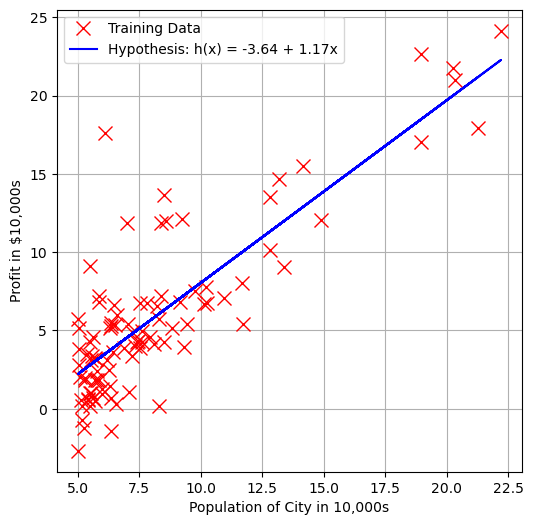

In [10]:
def myfit(xval):
    return theta[0] + theta[1]*xval
plt.figure(figsize=(6,6))
plt.plot(X[:,1],y[:,0],'rx',markersize=10,label='Training Data')

plt.plot(X[:,1],myfit(X[:,1]),'b-',label = 'Hypothesis: h(x) = %0.2f + %0.2fx'%(theta[0],theta[1]))
plt.grid(True) #Always plot.grid true!
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')
plt.legend()

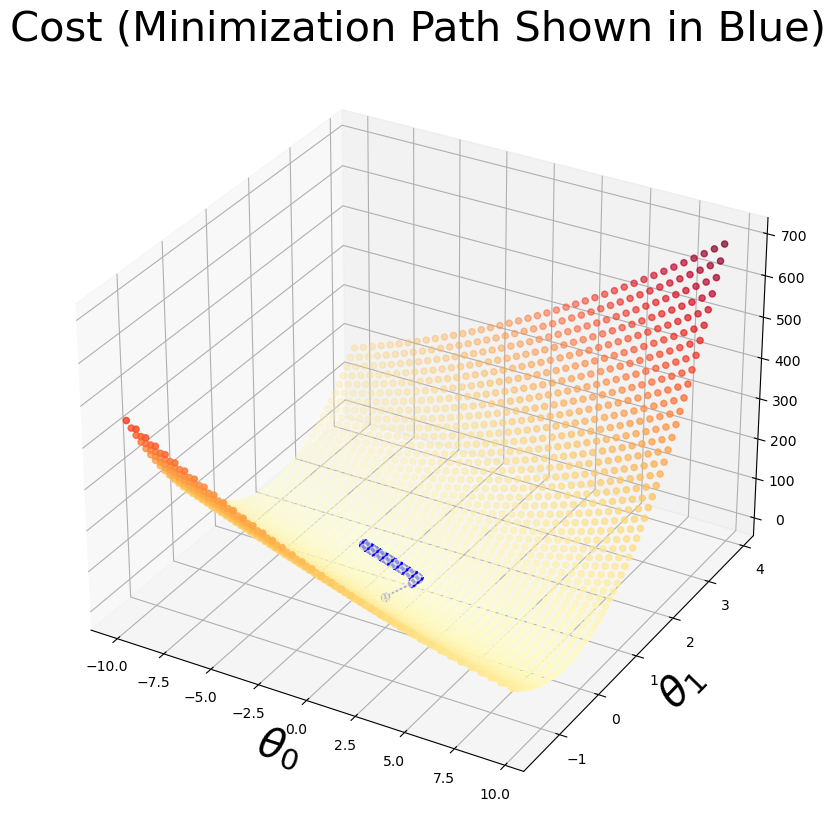

In [11]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d , Axes3D

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111,projection='3d')

xvals = np.arange(-10,10,.5)
yvals = np.arange(-1.5,4,.1)

myx , myy , myz = [] , [] , []


for i in xvals:
    for j in yvals:
        myx.append(i)
        myy.append(j)
        myz.append(computeCost(np.array([[i],[j]]) , X , y))
scat = ax.scatter(myx,myy,myz,c=np.abs(myz),cmap=plt.get_cmap('YlOrRd')) 

plt.xlabel(r'$\theta_0$',fontsize=30)
plt.ylabel(r'$\theta_1$',fontsize=30)
plt.title('Cost (Minimization Path Shown in Blue)',fontsize=30)
plt.plot([x[0] for x in thetahistory],[x[1] for x in thetahistory],jvec,'bo-')
plt.show()


        